<a href="https://colab.research.google.com/github/cheTsai/Gluu/blob/main/Gluu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount your Google Drive files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.
!pip install transformers

In [3]:
# Import nessessary libraries
from transformers import CLIPProcessor, CLIPModel
import torch

In [4]:
# get CLIP pre-trained model
model = CLIPModel.from_pretrained("laion/CLIP-ViT-H-14-laion2B-s32B-b79K")
processor = CLIPProcessor.from_pretrained("laion/CLIP-ViT-H-14-laion2B-s32B-b79K") # a wrapper for input data preprocessing. It includes both encoding the text using tokenizer and preparing the images.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.94G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [5]:
# For image displaying
!pip install Pillow

### Types test
Types from website:
1. Dress Shoes
2. Loafer
3. Boots (Ankle & Knee High)
4. High Heels & Stilettos
5. Sandals
6. Runners

Types for classification from AI Model
1. Dress Shoes
2. Loafer
3. Boots (Ankle)
4. Boots (Knee High)
5. High Heels & Stilettos
6. Sandals
7. Runners

In [6]:
# Import libraries
from PIL import Image
from transformers import pipeline
import os

from PIL import Image

def image_grid(imgs, cols):
    # Calculate the number of rows needed
    rows = (len(imgs) + cols - 1) // cols

    # Get the width and height of the first image (assuming all images are the same size)
    w, h = imgs[0].size

    # Create a new blank image with the appropriate size to fit all images in the grid
    grid = Image.new('RGB', size=(cols*w, rows*h))

    # Iterate over the list of images and paste each one into the grid
    for i, img in enumerate(imgs):
        # Calculate the position where the current image should be pasted
        x = (i % cols) * w  # Column position
        y = (i // cols) * h  # Row position
        # Paste the image at the calculated position
        grid.paste(img, box=(x, y))

    # Return the final grid image
    return grid

# Local directory containing the images
image_folder = '/content/drive/MyDrive/Colab_Notebooks/Gluu/datasets/test/background'

# List of image filenames in the local directory
image_filenames = [
    'Boots.jpeg',
    'Dress_shoes.jpeg',
    'High_Heels.jpeg',
    'Loafer.jpeg',
    'Runners.jpeg',
    'Sandals.jpg',
    'Stilettos.jpeg'
]

# Append the images together
images = []
for filename in image_filenames:
    img_path = os.path.join(image_folder, filename)
    images.append(Image.open(img_path))

grid = image_grid(images, cols=3)
grid.show()  # Use .show() for displaying the image grid


In [7]:
# List of class names for different types of shoes
classes = [
    'Dress Shoes', 'Loafer', 'Boots (Ankle)', 'Boots (Knee High)',
    'High Heels', 'Stilettos', 'Sandals', 'Runners of shoes'
]

# Process the text (class names) and images into tensors suitable for the model
inputs = processor(
    text=classes,        # List of class names
    images=images,       # List of images
    return_tensors="pt", # Return PyTorch tensors
    padding=True,        # Pad the inputs to the same length
    do_convert_rgb=False # Assume images are already in RGB format
)

# Pass the processed inputs through the model to get the outputs
outputs = model(**inputs)

# Extract the logits for image-text similarity
logits_per_image = outputs.logits_per_image

# Apply softmax to the logits to get probabilities for each class
probs = logits_per_image.softmax(dim=1)

# 'probs' now contains the probabilities of each image belonging to each class


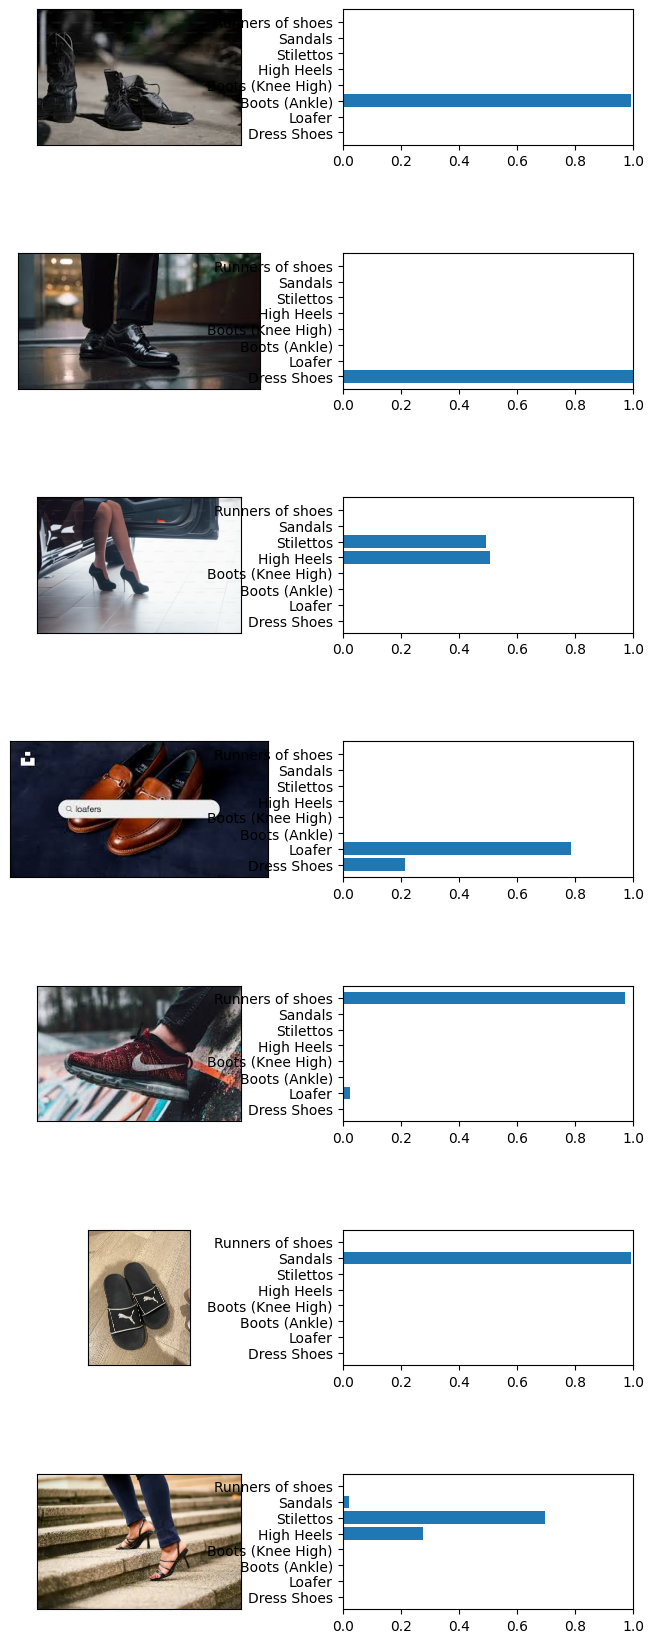

In [8]:
import matplotlib.pyplot as plt

# Create a figure with specified size (width, height)
fig = plt.figure(figsize=(8, 20))

# Loop over each image and its corresponding probabilities
for idx in range(len(images)):

    # Display the original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1)
    plt.imshow(images[idx])  # Show the image
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

    # Display the probabilities as a horizontal bar chart
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())), probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0, 1.0)  # Set x-axis limits to range from 0 to 1

    # Adjust subplot parameters for spacing
    plt.subplots_adjust(left=0.1,  # Adjust space to the left
                        bottom=0.1,  # Adjust space at the bottom
                        right=0.9,  # Adjust space to the right
                        top=0.9,  # Adjust space at the top
                        wspace=0.2,  # Adjust horizontal space between subplots
                        hspace=0.8)  # Adjust vertical space between subplots

# Display the figure with all subplots
plt.show()


### Materials test

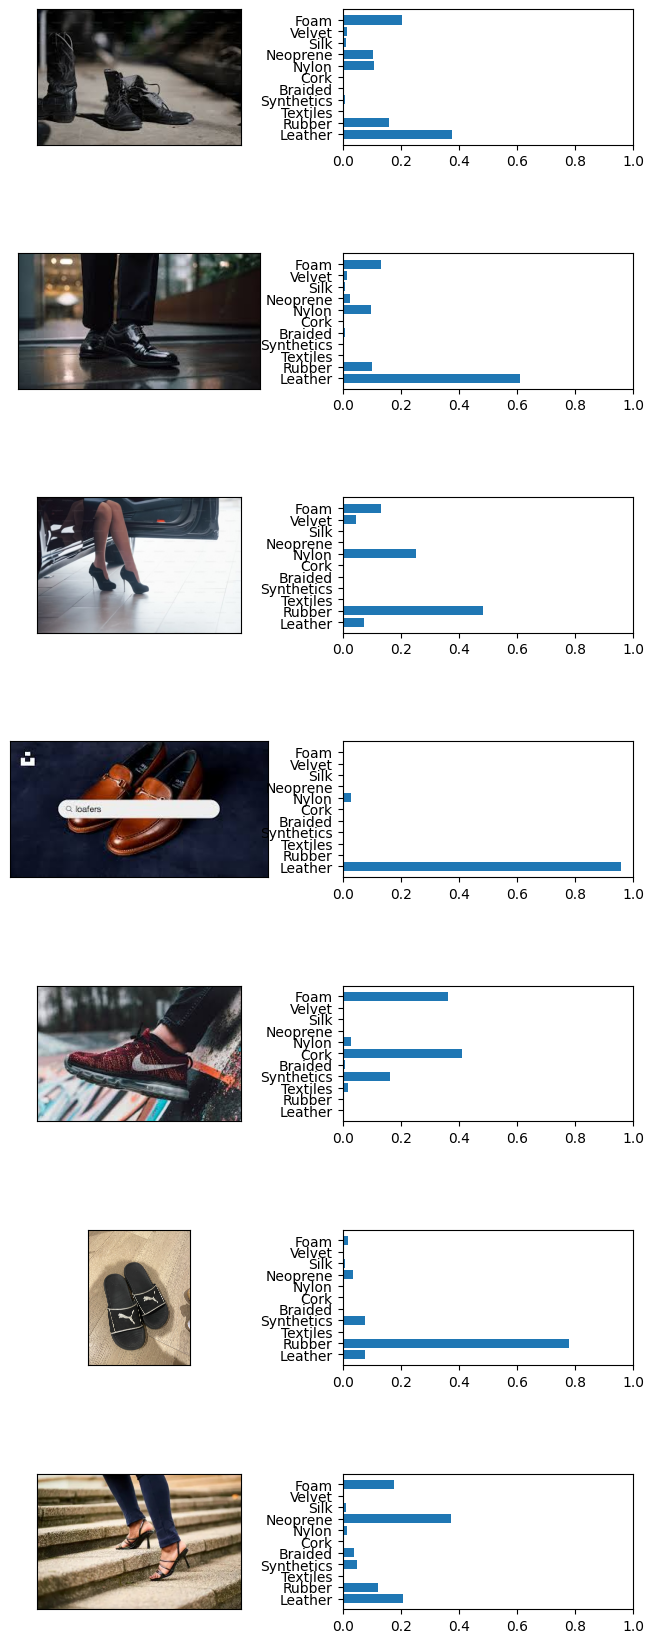

In [9]:
# List of material classes
classes = [
    'Leather', 'Rubber', 'Textiles', 'Synthetics', 'Braided',
    'Cork', 'Nylon', 'Neoprene', 'Silk', 'Velvet', 'Foam'
]

# Process the text (material classes) and images into tensors suitable for the model
inputs = processor(
    text=classes,        # List of material classes
    images=images,       # List of images to classify
    return_tensors="pt", # Convert inputs to PyTorch tensors
    padding=True,        # Pad the inputs to the same length
    do_convert_rgb=False # Assume images are already in RGB format
)

# Pass the processed inputs through the model to get the outputs
outputs = model(**inputs)

# Extract the logits for image-text similarity from the model outputs
logits_per_image = outputs.logits_per_image

# Apply softmax to the logits to get probabilities for each material class
probs = logits_per_image.softmax(dim=1)

# Import Matplotlib for visualization
import matplotlib.pyplot as plt

# Create a figure for plotting with specified size (width, height)
fig = plt.figure(figsize=(8, 20))

# Loop over each image and its corresponding probabilities
for idx in range(len(images)):
    # Display the original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1)  # Add subplot for the image
    plt.imshow(images[idx])  # Show the image
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

    # Display the probabilities as a horizontal bar chart
    fig.add_subplot(len(images), 2, 2*(idx+1))  # Add subplot for the bar chart
    plt.barh(range(len(probs[0].detach().numpy())), probs[idx].detach().numpy(), tick_label=classes)  # Create a horizontal bar chart
    plt.xlim(0, 1.0)  # Set x-axis limits to range from 0 to 1

    # Adjust subplot parameters for spacing
    plt.subplots_adjust(
        left=0.1,  # Adjust space to the left
        bottom=0.1,  # Adjust space at the bottom
        right=0.9,  # Adjust space to the right
        top=0.9,  # Adjust space at the top
        wspace=0.2,  # Adjust horizontal space between subplots
        hspace=0.8  # Adjust vertical space between subplots
    )

# Display the figure with all subplots
plt.show()


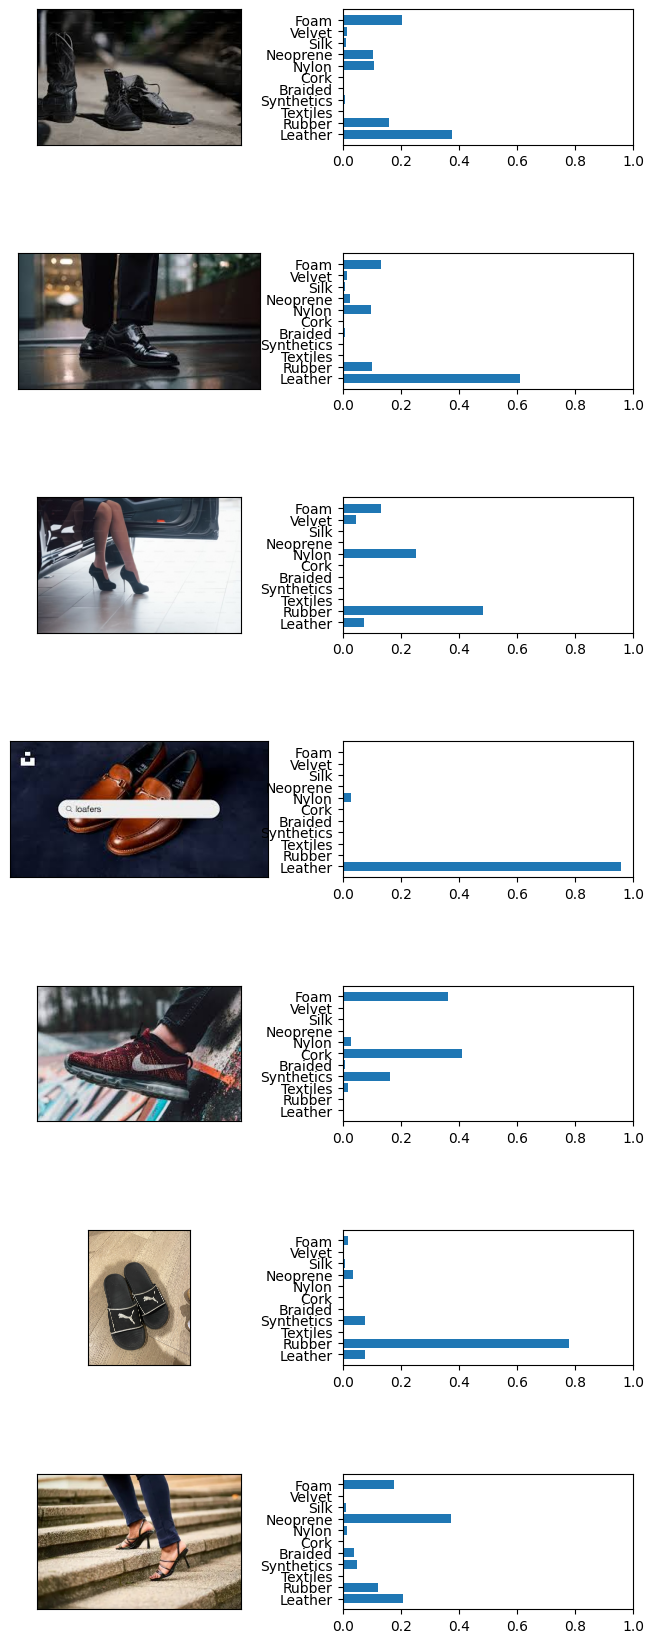

In [10]:
import matplotlib.pyplot as plt

# Create a figure for plotting with specified size (width, height)
fig = plt.figure(figsize=(8, 20))

# Loop over each image and its corresponding probabilities
for idx in range(len(images)):

    # Display the original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1)  # Add a subplot for the image
    plt.imshow(images[idx])  # Show the image
    plt.xticks([])  # Remove x-axis ticks for a cleaner look
    plt.yticks([])  # Remove y-axis ticks for a cleaner look

    # Display the probabilities as a horizontal bar chart
    fig.add_subplot(len(images), 2, 2*(idx+1))  # Add a subplot for the bar chart
    plt.barh(range(len(probs[0].detach().numpy())), probs[idx].detach().numpy(), tick_label=classes)  # Create a horizontal bar chart
    plt.xlim(0, 1.0)  # Set x-axis limits to range from 0 to 1, as probabilities range between 0 and 1

    # Adjust subplot parameters for spacing
    plt.subplots_adjust(left=0.1,  # Adjust space to the left
                        bottom=0.1,  # Adjust space at the bottom
                        right=0.9,  # Adjust space to the right
                        top=0.9,  # Adjust space at the top
                        wspace=0.2,  # Adjust horizontal space between subplots
                        hspace=0.8)  # Adjust vertical space between subplots

# Display the figure with all subplots
plt.show()


### Damage test:
Reference: https://www.v-trust.com/en/blog/top-10-shoe-defects-every-buyer-should-know

In [11]:
# Import necessary libraries
from PIL import Image
from transformers import pipeline
import os

# Local directory containing the images
image_folder = '/content/drive/MyDrive/Colab_Notebooks/Gluu/datasets/test/Damage'

# List of image filenames in the local directory
image_filenames = [
    'Broken_stitches.jpeg',  # Filename of the image showing broken stitches
    'dirty.jpeg',            # Filename of the image showing a dirty item
    'Leather_faded.jpeg',    # Filename of the image showing faded leather
    'Opened_seam.jpeg',      # Filename of the image showing an opened seam
    'Slanted_heel.jpeg',     # Filename of the image showing a slanted heel
    'Sole_not_flat.jpeg',    # Filename of the image showing a sole that is not flat
    'tears.jpeg',            # Filename of the image showing tears
    'Weak_cementing.jpeg',   # Filename of the image showing weak cementing
    'Weak_cementing1.jpeg',  # Another filename of the image showing weak cementing
    'wrinkles.jpeg',         # Filename of the image showing wrinkles
]

# Initialize an empty list to store the images
images = []
for filename in image_filenames:
    # Construct the full path to the image file
    img_path = os.path.join(image_folder, filename)

    # Open the image file and append it to the images list
    images.append(Image.open(img_path))

# Function to create an image grid (this should be defined or imported earlier in the script)
def image_grid(imgs, cols):
    # Calculate the number of rows required
    rows = (len(imgs) + cols - 1) // cols

    # Get the size of the first image (assuming all images are the same size)
    w, h = imgs[0].size

    # Create a new blank image with a size to fit all images in a grid
    grid = Image.new('RGB', size=(cols*w, rows*h))

    # Loop through each image and paste it into the grid
    for i, img in enumerate(imgs):
        # Calculate the position where the image should be pasted
        grid.paste(img, box=(i % cols * w, i // cols * h))

    # Return the combined image grid
    return grid

# Create an image grid with the specified number of columns
grid = image_grid(images, cols=3)

# Display the image grid
grid.show()  # Use .show() for displaying the image grid


In [12]:
# Define the list of classes (labels) corresponding to different types of damage
classes = [
    'Broken stitches',
    'Opened seam',
    'Slanted heel',
    'Sole not flat',
    'Peeling leather/tears',
    'Weak cementing',
    'wrinkles',
    'dirty shoes',
    'Leather Faded'
]

# Process the text (class labels) and images to create the inputs for the model
inputs = processor(
    text=classes,               # List of class labels
    images=images,              # List of images to be classified
    return_tensors="pt",        # Return the data as PyTorch tensors
    padding=True,               # Pad the inputs to the same length
    do_convert_rgb=False        # Do not convert images to RGB (assuming they are already in RGB format)
)

# Pass the inputs through the model to get the outputs
outputs = model(**inputs)

# Extract the logits for image-text similarity scores
logits_per_image = outputs.logits_per_image  # This is the image-text similarity score

# Apply softmax to the logits to get the probabilities for each class
probs = logits_per_image.softmax(dim=1)  # Take the softmax to get the label probabilities

# Get the highest scoring label for each image
predicted_labels = torch.argmax(probs, dim=1)


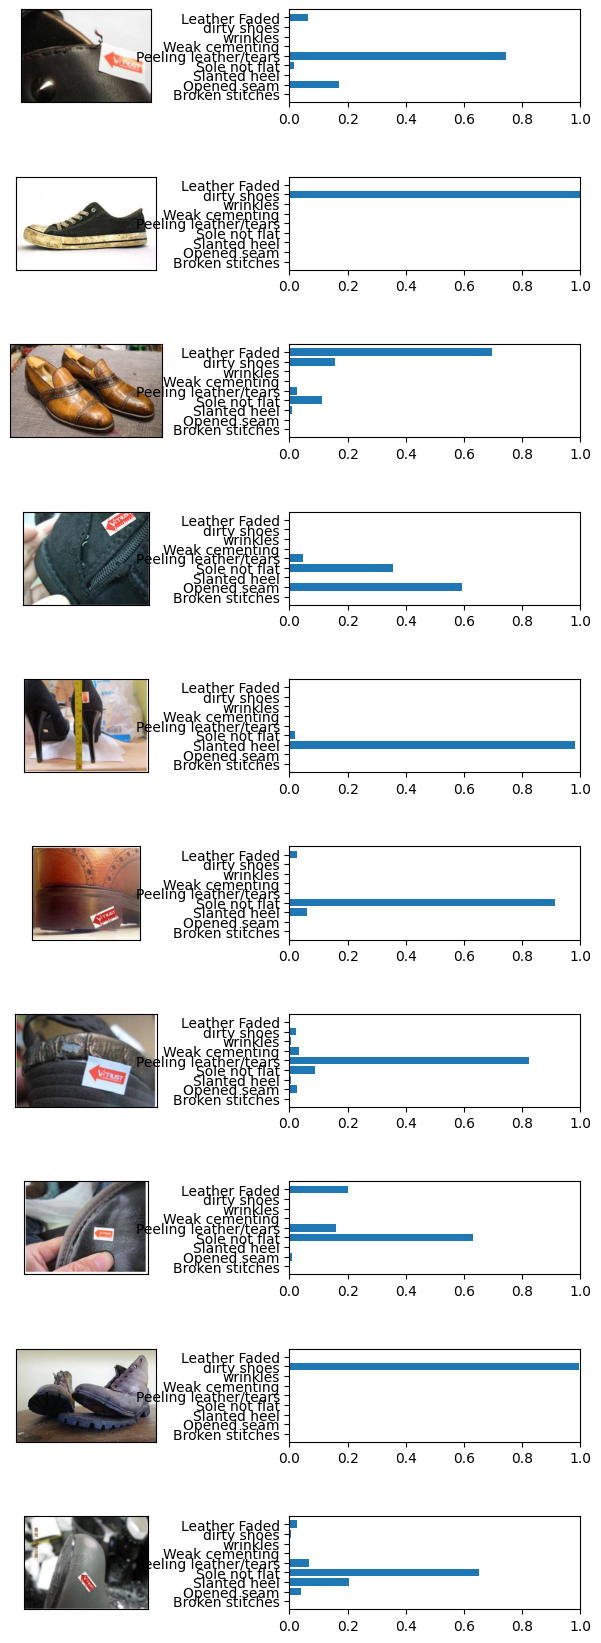

In [13]:
import matplotlib.pyplot as plt

# Create a figure for plotting with specified size (width, height)
fig = plt.figure(figsize=(8, 20))

# Iterate over each image and its corresponding probabilities
for idx in range(len(images)):

    # Show the original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1)
    plt.imshow(images[idx])  # Display the image
    plt.xticks([])  # Remove x-axis ticks for a cleaner look
    plt.yticks([])  # Remove y-axis ticks for a cleaner look

    # Show the predicted probabilities as a horizontal bar chart
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())), probs[idx].detach().numpy(), tick_label=classes)  # Create a horizontal bar chart
    plt.xlim(0, 1.0)  # Set x-axis limits to range from 0 to 1, as probabilities range between 0 and 1

    # Adjust subplot parameters for spacing
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.8)

# Display the figure with all subplots
plt.show()


### Point to craftperson
1. Heel Repair -> Category with Heel & Slanted Heels
2. Half Sole -> Weak cementing
3. Full sole -> Weak cementing
4. Patch & Sweing Repair -> Broken stitches & Opened seam
5. Hardware Repair -> Sole not flat, wrinkles
6. Insole Repair
7. Internet Heal or Linear Repair
8. Leather Care(Cleaning, Polishing) -> Dirty shoes
9. Leather Customization (RE-DYE) -> Leather faded
10. Leather Alternation (Adjustment of uppers, etc widen calf of the top) -> Peeling leather/tears



In [14]:
# Print the results
for i, label_idx in enumerate(predicted_labels):
    # Print the filename of the image and the predicted class label
    print(f"Image {image_filenames[i]} is predicted to be: {classes[label_idx]}")

    # Provide specific recommendations based on predicted classes
    if str(classes[label_idx]) == 'Broken stitches':
        print("Should be: Patch & Sewing Repair")
    elif str(classes[label_idx]) == 'Opened seam':
        print("Should be: Patch & Sewing Repair")
    elif str(classes[label_idx]) == 'Slanted heel':
        print("Should be: Heel Repair")
    elif str(classes[label_idx]) == 'Sole not flat':
        print("Should be: Hardware Repair")
    elif str(classes[label_idx]) == 'Peeling leather/tears':
        print("Should be: Leather Alternation")
    elif str(classes[label_idx]) == 'Weak cementing':
        print("Should be: Half/Full sole")
    elif str(classes[label_idx]) == 'wrinkles':
        print("Should be: Hardware Repair")
    elif str(classes[label_idx]) == 'dirty shoes':
        print("Should be: Leather Care")
    elif str(classes[label_idx]) == 'Leather Faded':
        print("Should be: Leather Customization RE-DYE")
    else:
        print("There are no specific recommendations for this class")


Image Broken_stitches.jpeg is predicted to be: Peeling leather/tears
Should be: Leather Alternation
Image dirty.jpeg is predicted to be: dirty shoes
Should be: Leather Care
Image Leather_faded.jpeg is predicted to be: Leather Faded
Should be: Leather Customization RE-DYE
Image Opened_seam.jpeg is predicted to be: Opened seam
Should be: Patch & Sewing Repair
Image Slanted_heel.jpeg is predicted to be: Slanted heel
Should be: Heel Repair
Image Sole_not_flat.jpeg is predicted to be: Sole not flat
Should be: Hardware Repair
Image tears.jpeg is predicted to be: Peeling leather/tears
Should be: Leather Alternation
Image Weak_cementing.jpeg is predicted to be: Sole not flat
Should be: Hardware Repair
Image Weak_cementing1.jpeg is predicted to be: dirty shoes
Should be: Leather Care
Image wrinkles.jpeg is predicted to be: Sole not flat
Should be: Hardware Repair


# Demo
- Demo 1: Correct to match
Structure:
1. User input
2. Image import
3. Classify damage of shoes
4. Classify type of shoes
5. Classify material of shoes
6. Comparing input and model output section

- Demo 2: Fail to match
1. User input
2. Image import
3. Classify damage of shoes
4. Classify type of shoes
5. Classify material of shoes
6. Comparing input and model output section

User input

In [15]:
# Customer input
input_customer_type = "Dress Shoes"
input_customer_restoration = "Leather Customization RE-DYE"

# string variable for storing outcome
damage = ""
material = ""
shoes_type = ""

Pre-definned function to display information for backend

In [16]:
"""
print_info function:
this is just print the information to craftperson to support faster process.
"""
def print_info(control, predicted_type, predicted_damage, predicted_material, input_customer_type, input_customer_restoration):
  # print out the information -> match outcome
  if control == "correct":
    print("the information is correct:")
    print("Shoes type:", predicted_type)
    print("Shoes damage:", predicted_damage)
    print("Shoes material:", predicted_material)
  # print out the information -> unmatch outcome
  elif control == "wrong":
    print("The information:")
    print("The customer input:")
    print("type:" + input_customer_type)
    print("damage:" + input_customer_restoration)
    print("The model output:")
    print("Shoes type:", predicted_type)
    print("Shoes damage:", predicted_damage)
    print("Shoes material:", predicted_material)

## Image import

In [17]:
# Local directory containing the images
image_folder = '/content/drive/MyDrive/Colab_Notebooks/Gluu/datasets/test/Damage'

# List of image filenames in the local directory
image_filenames = [
    'Leather_faded.jpeg',  # Filename of the image showing faded leather
]

images = []
for filename in image_filenames:
    img_path = os.path.join(image_folder, filename)  # Construct the full path to the image file
    images.append(Image.open(img_path))  # Open the image file and append it to the images list

# Assuming image_grid is defined elsewhere in the script or imported
grid = image_grid(images, cols=3)  # Create an image grid with 3 columns
grid.show()  # Display the image grid using .show()


## Classify damage

In [18]:
# List of damage classes (labels)
classes = [
    'Broken stitches',
    'Opened seam',
    'Slanted heel',
    'Sole not flat',
    'Peeling leather/tears',
    'Weak cementing',
    'wrinkles',
    'dirty shoes',
    'Leather Faded'
]

# Process text (classes) and images using a transformer pipeline (processor)
inputs = processor(
    text=classes,               # List of damage classes
    images=images,              # List of images to process
    return_tensors="pt",        # Return PyTorch tensors
    padding=True,               # Pad inputs to the same length
    do_convert_rgb=False        # Assume images are already in RGB format
)

# Pass inputs through the model to get outputs
outputs = model(**inputs)

# Extract logits for image-text similarity scores
logits_per_image = outputs.logits_per_image  # Tensor of similarity scores

# Apply softmax to logits to get class probabilities
probs = logits_per_image.softmax(dim=1)  # Probabilities for each class label

# Get the highest scoring label (class) for each image
predicted_damage = torch.argmax(probs, dim=1)  # Tensor of predicted class indices

# Convert predicted class index to damage label string
damage = str(classes[predicted_damage])  # Get the damage label for the predicted class

# Print the predicted damage label
print(damage)


Leather Faded


## Classify type

In [19]:
# List of shoe types (labels)
classes = [
    'Dress Shoes',
    'Loafer',
    'Boots (Ankle)',
    'Boots (Knee High)',
    'High Heels',
    'Stilettos',
    'Sandals',
    'Runners of shoes'
]

# Process text (classes) and images using a transformer pipeline (processor)
inputs = processor(
    text=classes,               # List of shoe types
    images=images,              # List of images to process
    return_tensors="pt",        # Return PyTorch tensors
    padding=True,               # Pad inputs to the same length
    do_convert_rgb=False        # Assume images are already in RGB format
)

# Pass inputs through the model to get outputs
outputs = model(**inputs)

# Extract logits for image-text similarity scores
logits_per_image = outputs.logits_per_image  # Tensor of similarity scores

# Apply softmax to logits to get class probabilities
probs = logits_per_image.softmax(dim=1)  # Probabilities for each shoe type label

# Get the highest scoring label (shoe type) for each image
predicted_type = torch.argmax(probs, dim=1)  # Tensor of predicted shoe type indices

# Convert predicted shoe type index to string label
shoes_type = str(classes[predicted_type])  # Get the shoe type label for the predicted class

# Print the predicted shoe type label
print(shoes_type)


Dress Shoes


## Classify material

In [20]:
# List of material classes (labels)
classes = [
    'Leather',
    'Rubber',
    'Textiles',
    'Synthetics',
    'Braided',
    'Cork',
    'Nylon',
    'Neoprene',
    'Silk',
    'Velvet',
    'Foam'
]

# Process text (classes) and images using a transformer pipeline (processor)
inputs = processor(
    text=classes,               # List of material classes
    images=images,              # List of images to process
    return_tensors="pt",        # Return PyTorch tensors
    padding=True,               # Pad inputs to the same length
    do_convert_rgb=False        # Assume images are already in RGB format
)

# Pass inputs through the model to get outputs
outputs = model(**inputs)

# Extract logits for image-text similarity scores
logits_per_image = outputs.logits_per_image  # Tensor of similarity scores

# Apply softmax to logits to get class probabilities
probs = logits_per_image.softmax(dim=1)  # Probabilities for each material label

# Get the highest scoring label (material) for each image
predicted_material = torch.argmax(probs, dim=1)  # Tensor of predicted material indices

# Convert predicted material index to string label
material = str(classes[predicted_material])  # Get the material label for the predicted class

# Print the predicted material label
print(material)


Leather


## Comparing input and model output section


In [21]:
# Broken Stitches
if damage == 'Broken stitches' :
  if shoes_type == input_customer_type and input_customer_restoration == "Patch & Sewing Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Open seam
elif damage == 'Opened seam':
  if shoes_type == input_customer_type and input_customer_restoration == "Patch & Sewing Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Slanted heel
elif damage == 'Slanted heel':
  if shoes_type == input_customer_type and input_customer_restoration == "Heel Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Sole not flat
elif damage == 'Sole not flat':
  if shoes_type == input_customer_type and input_customer_restoration == "Hardware Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Peeling leather/tears
elif damage == 'Peeling leather/tears' :
  if shoes_type == input_customer_type and input_customer_restoration == "Leather Alternation":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Weak cementing
elif damage == 'Weak cementing' :
  if shoes_type == input_customer_type and input_customer_restoration == "Half/Full sole":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Wrinkles
elif damage == 'wrinkles':
  if shoes_type == input_customer_type and input_customer_restoration == "Hardware Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Dirty shoes
elif damage == 'dirty shoes':
  if shoes_type == input_customer_type and input_customer_restoration == "Leather Care":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Leather Faded
elif damage == 'Leather Faded':
  if shoes_type == input_customer_type and input_customer_restoration == "Leather Customization RE-DYE":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
else:
  print("There is no recommendations")

the information is correct:
Shoes type: Dress Shoes
Shoes damage: Leather Faded
Shoes material: Leather


# Demo 2: Unmatch

## User input

In [22]:
# Customer input
input_customer_type = "Boost"
input_customer_restoration = "Hardware Repair"

# string variable for storing outcome
damage = ""
material = ""
shoes_type = ""

## Image import

In [23]:
# Local directory containing the images
image_folder = '/content/drive/MyDrive/Colab_Notebooks/Gluu/datasets/test/Damage'

# List of image filenames in the local directory
image_filenames = [
    'wrinkles.jpeg',
]

images = []
for filename in image_filenames:
    img_path = os.path.join(image_folder, filename)
    images.append(Image.open(img_path))

grid = image_grid(images, cols=3)
grid.show()  # Use .show() for displaying the image grid


## Classify damage

In [24]:
classes = ['Broken stitches',
           'Opened seam',
           'Slanted heel',
           'Sole not flat',
           'Peeling leather/tears',
           'Weak cementing',
           'wrinkles',
           'dirty shoes',
           'Leather Faded'
           ]
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True, do_convert_rgb=False)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

# Get the highest scoring label for each image
predicted_damage = torch.argmax(probs, dim=1)
damage = str(classes[predicted_damage])
print(damage)

Sole not flat


## Classify types

In [25]:
classes = ['Dress Shoes', 'Loafer', 'Boots (Ankle)',  'Boots (Knee High)', 'High Heels', 'Stilettos', 'Sandals', 'Runners of shoes']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True, do_convert_rgb=False)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

# Get the highest scoring label for each image
predicted_type = torch.argmax(probs, dim=1)
shoes_type = str(classes[predicted_type])
print(shoes_type)

Boots (Knee High)


## Classify material

In [26]:
classes = ['Leather',
           'Rubber',
           'Textiles',
           'Synthetics',
           'Braided',
           'Cork',
           'Nylon',
           'Neoprene',
           'Silk',
           'Velvet',
           'Foam']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True, do_convert_rgb=False)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

# Get the highest scoring label for each image
predicted_material = torch.argmax(probs, dim=1)
material = str(classes[predicted_material])
print(material)

Foam


## Comparing input and model output section

In [27]:
# Broken Stitches
if damage == 'Broken stitches' :
  if shoes_type == input_customer_type and input_customer_restoration == "Patch & Sewing Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Open seam
elif damage == 'Opened seam':
  if shoes_type == input_customer_type and input_customer_restoration == "Patch & Sewing Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Slanted heel
elif damage == 'Slanted heel':
  if shoes_type == input_customer_type and input_customer_restoration == "Heel Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Sole not flat
elif damage == 'Sole not flat':
  if shoes_type == input_customer_type and input_customer_restoration == "Hardware Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Peeling leather/tears
elif damage == 'Peeling leather/tears' :
  if shoes_type == input_customer_type and input_customer_restoration == "Leather Alternation":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Weak cementing
elif damage == 'Weak cementing' :
  if shoes_type == input_customer_type and input_customer_restoration == "Half/Full sole":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Wrinkles
elif damage == 'wrinkles':
  if shoes_type == input_customer_type and input_customer_restoration == "Hardware Repair":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Dirty shoes
elif damage == 'dirty shoes':
  if shoes_type == input_customer_type and input_customer_restoration == "Leather Care":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
# Leather Faded
elif damage == 'Leather Faded':
  if shoes_type == input_customer_type and input_customer_restoration == "Leather Customization RE-DYE":
    print_info("correct", shoes_type, damage, material, input_customer_type, input_customer_restoration)
  else:
    print_info("wrong", shoes_type, damage, material, input_customer_type, input_customer_restoration)
else:
  print("There is no recommendations")

The information:
The customer input:
type:Boost
damage:Hardware Repair
The model output:
Shoes type: Boots (Knee High)
Shoes damage: Sole not flat
Shoes material: Foam


In [28]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.3
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.7
cuda-python==12.2.1
cudf-cu12 @ https://pypi.nvidia.c